1.scrap data from the website

In [1]:
import requests
import urllib.request
import time 
from bs4 import BeautifulSoup

In [2]:
url='https://ec.europa.eu/programmes/horizon2020/en/h2020-section/information-and-communication-technologies#Article'

In [3]:
response=requests.get(url)

In [7]:
contnt=soup.find('div',{'class':"field field-name-body field-type-text-with-summary field-label-hidden"})

In [8]:
soup=BeautifulSoup(response.text,'html.parser')

In [9]:
articls=' '
for i in contnt.findAll('div'):
  articls=articls+' '+i.text
print(articls)

  The potential and capabilities of modern ICT systems are still growing exponentially fuelled by the progress in electronics, microsystems, networking, the ability to master increasingly complex cyber-physical systems and robots, and progress in data processing and human machine interfaces. These developments provide major opportunities for Europe to develop the next generation of open platforms on top of which a multiplicity of innovative devices, systems and applications can be implemented.These new solutions will enable a wealth of new business developments in particular for SMEs, and will contribute to boosting competitiveness, creating jobs and supporting growth.Main features of the Work ProgrammeThe first ICT-Leadership in Enabling and Industrial Technologies (LEIT) Work Programme under H2020 provides a balanced response to the main challenges faced by Europe in the field: firstly, the need to maintain a strong expertise in key technology value chains; secondly, the necessity to

**Used different type of nlp method to clean the text data and extract the text and analyze the text data**

In [82]:
#nlp library import 
import nltk
import re
import string
from nltk.tokenize import word_tokenize
import os
from nltk.stem import WordNetLemmatizer
from nltk.tag.stanford import StanfordNERTagger
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import  numpy as np
import requests
from os import path
import gensim
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator

import matplotlib.pyplot as plt
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**clean the text data remove unwanted material from the data**

In [11]:
#here we clean the text data
wordnet = WordNetLemmatizer()
def cleandata(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x
data=cleandata(articls)

**Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords**

In [13]:
#tokenize to words
words = nltk.word_tokenize(data)
words

['potential',
 'capabilities',
 'modern',
 'ict',
 'systems',
 'still',
 'growing',
 'exponentially',
 'fuelled',
 'progress',
 'electronics',
 'microsystems',
 'networking',
 'ability',
 'master',
 'increasingly',
 'complex',
 'cyber',
 'physical',
 'systems',
 'robots',
 'progress',
 'data',
 'processing',
 'human',
 'machine',
 'interfaces',
 'developments',
 'provide',
 'major',
 'opportunities',
 'europe',
 'develop',
 'next',
 'generation',
 'open',
 'platforms',
 'top',
 'multiplicity',
 'innovative',
 'devices',
 'systems',
 'applications',
 'implemented',
 'these',
 'new',
 'solutions',
 'enable',
 'wealth',
 'new',
 'business',
 'developments',
 'particular',
 'smes',
 'contribute',
 'boosting',
 'competitiveness',
 'creating',
 'jobs',
 'supporting',
 'growth',
 'main',
 'features',
 'work',
 'programmethe',
 'first',
 'ict',
 'leadership',
 'enabling',
 'industrialtechnologies',
 'leit',
 'work',
 'programme',
 'provides',
 'balanced',
 'response',
 'main',
 'challenges',
 

**Any word which reprsents a person, organization, location etc. is a Named Entity. Named entity recognition is a subtask of Information Extraction and is the process of identifying words which are named entities in a given text. It is also called entity identification or entity chunking**
**More powerful package than NLTK**
**split the sentence into words with NLTK's word tokenizer. Each word is a token. Then put the tokenized sentence through the tagger. And the output will be a list of tuples of the token and its named entity tag**

In [22]:

!wget 'https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip'
!unzip stanford-ner-2018-10-16.zip

nltk.download('punkt')

st = StanfordNERTagger('/content/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
                       '/content/stanford-ner-2018-10-16/stanford-ner.jar',
                       encoding='utf-8')

--2021-08-23 15:21:52--  https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip [following]
--2021-08-23 15:21:52--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180358328 (172M) [application/zip]
Saving to: ‘stanford-ner-2018-10-16.zip’

stanford-ner-2018-1 100%[===================>] 172.00M  4.94MB/s    in 32s     

2021-08-23 15:22:25 (5.41 MB/s) - ‘stanford-ner-2018-10-16.zip’ saved [180358328/180358328]

Archive:  stanford-ner-2018-10-16.

/usr/local/lib/python3.7/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [23]:
tokenized_text = word_tokenize(data)
classified_text = st.tag(tokenized_text)

In [24]:
classified_text

[('potential', 'O'),
 ('capabilities', 'O'),
 ('modern', 'O'),
 ('ict', 'O'),
 ('systems', 'O'),
 ('still', 'O'),
 ('growing', 'O'),
 ('exponentially', 'O'),
 ('fuelled', 'O'),
 ('progress', 'O'),
 ('electronics', 'O'),
 ('microsystems', 'O'),
 ('networking', 'O'),
 ('ability', 'O'),
 ('master', 'O'),
 ('increasingly', 'O'),
 ('complex', 'O'),
 ('cyber', 'O'),
 ('physical', 'O'),
 ('systems', 'O'),
 ('robots', 'O'),
 ('progress', 'O'),
 ('data', 'O'),
 ('processing', 'O'),
 ('human', 'O'),
 ('machine', 'O'),
 ('interfaces', 'O'),
 ('developments', 'O'),
 ('provide', 'O'),
 ('major', 'O'),
 ('opportunities', 'O'),
 ('europe', 'O'),
 ('develop', 'O'),
 ('next', 'O'),
 ('generation', 'O'),
 ('open', 'O'),
 ('platforms', 'O'),
 ('top', 'O'),
 ('multiplicity', 'O'),
 ('innovative', 'O'),
 ('devices', 'O'),
 ('systems', 'O'),
 ('applications', 'O'),
 ('implemented', 'O'),
 ('these', 'O'),
 ('new', 'O'),
 ('solutions', 'O'),
 ('enable', 'O'),
 ('wealth', 'O'),
 ('new', 'O'),
 ('business', 'O'

**Keyword extraction (also known as keyword detection or keyword analysis) is a text analysis technique that automatically extracts the most used and most important words and expressions from a text. It helps summarize the content of texts and recognize the main topics discussed.**

**It’s used to find keywords from all manner of text: regular documents and business reports, social media comments, online forums and reviews, news reports, and more.**

**Word Clouds display the most prominent or frequent words in a body of text**

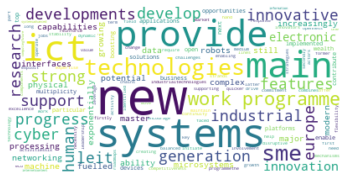

In [45]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white',
                          max_words=400,
                          max_font_size=60, 
                          random_state=0).generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
#key phrases remove through nlp
gensim.summarization.keywords(data, ratio=0.5,words=None,split=True, scores=False,  pos_filter=('NN', 'JJ'), lemmatize=True, deacc=True)             


['new',
 'technologies',
 'innovators',
 'ict systems',
 'europe develop',
 'support industrial',
 'main features work',
 'human',
 'programme provides',
 'electronic',
 'sme instrument',
 'activities',
 'enabling',
 'research excellence',
 'flexibility openness',
 'exponentially fuelled progress',
 'generation',
 'leit',
 'firstly need maintain strong',
 'networking ability master increasingly complex cyber',
 'cooperation dedicated action',
 'cutting topics addressing',
 'medium long term commitment',
 'value chains secondly',
 'exploit leverage',
 'contribute boosting competitiveness creating',
 'security internet things',
 'applications',
 'continuity',
 'potential capabilities',
 'systemsadvanced computingfuture',
 'strands require',
 'digital']

**Sentiment analysis seeks to quantify the emotional intensity of words and phrases within a text.**

In [80]:
#remove sentiment from the text
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(data)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: 0.9993, neg: 0.02, neu: 0.654, pos: 0.326, 

**Thanku you**